# Choro Legends # 

In [1]:
import geopandas 
from geopandas import read_file
import mapclassify
import libpysal
import matplotlib

In [2]:
# Default Legend Formatting #
_ = libpysal.examples.load_example('South')
pth = libpysal.examples.get_path('south.shp')

df = read_file(pth)

# Default Legend Formatting #

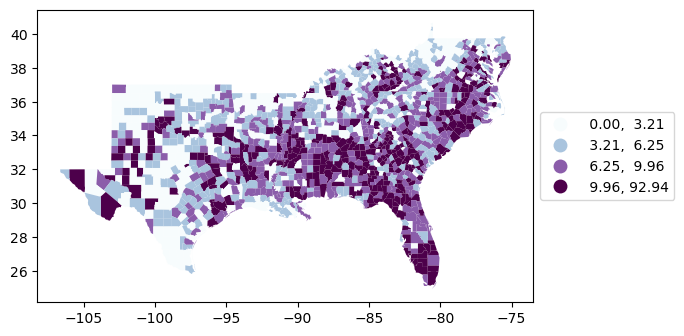

In [3]:
%matplotlib inline 
### This basically makes any plots that happen in the code occur directly below in the output #
ax = df.plot(column = 'HR60', scheme = 'QUANTILES', k = 4, \
    cmap = 'BuPu', legend = True, 
    legend_kwds = {'loc': 'center left', 'bbox_to_anchor': (1,0.5)})

# Scheme is how it's broken down, k is the number of categories (in this case breaking Quantiles down into 4 groups) #

In [5]:
labels = [t.get_text() for t in ax.get_legend().get_texts()]

labels

[' 0.00,  3.21', ' 3.21,  6.25', ' 6.25,  9.96', ' 9.96, 92.94']

In [6]:
# Separating the column HR60 in the dataframe into four equal groups # 
q4 = mapclassify.Quantiles(df.HR60, k = 4)
q4

Quantiles

   Interval      Count
----------------------
[ 0.00,  3.21] |   353
( 3.21,  6.25] |   353
( 6.25,  9.96] |   353
( 9.96, 92.94] |   353

In [7]:
labels == q4.get_legend_classes()

False

# Overriding Numerical Format 

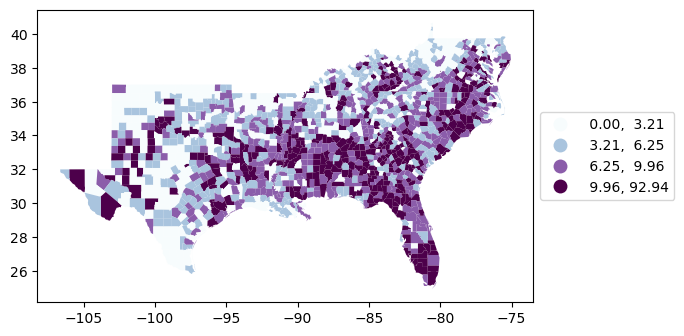

In [9]:
ax = df.plot(column = 'HR60', scheme = 'QUANTILES', k = 4, \
    cmap = 'BuPu', legend = True, 
    legend_kwds = {'loc': 'center left', 'bbox_to_anchor': (1,0.5)})

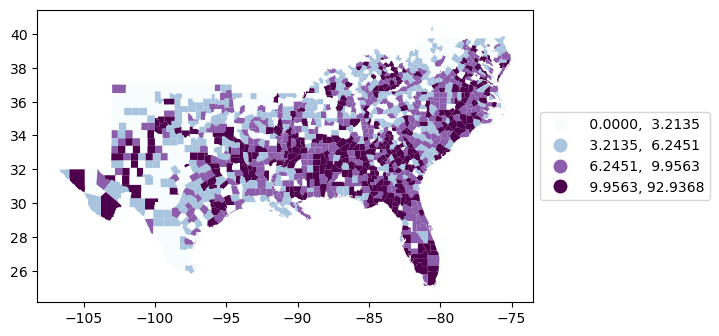

In [12]:
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),  'fmt':"{:.4f}"})
             # Pretty sure it just adds four decimal points in the legend afterwards #

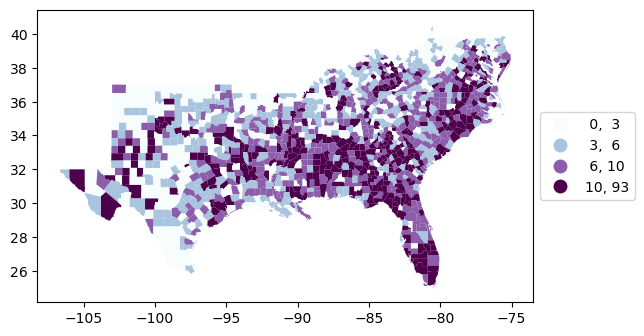

In [13]:
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),  'fmt':"{:.0f}"})
             # fmt 0f dictates the number of decimal places in legend, 4f = four decimal place values, 0 = None #

# First Class Lower Bound <y.min()> #

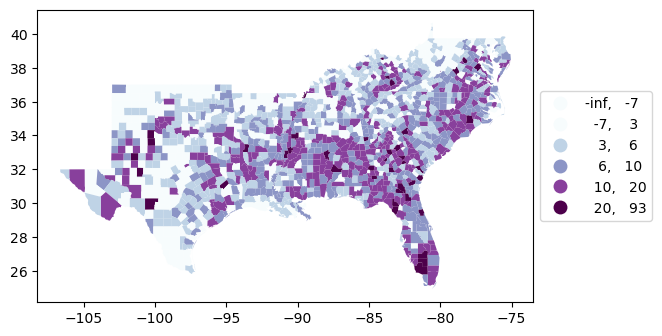

In [14]:
ax = df.plot(column='HR60', scheme='BoxPlot', \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'fmt': "{:.0f}"})
                         # including values less than 0 #

In [15]:
bp = mapclassify.BoxPlot(df.HR60)

bp

BoxPlot

   Interval      Count
----------------------
( -inf, -6.90] |     0
(-6.90,  3.21] |   353
( 3.21,  6.25] |   353
( 6.25,  9.96] |   353
( 9.96, 20.07] |   311
(20.07, 92.94] |    42

In [17]:
bp.get_legend_classes(fmt = "{:.0f}")

['(-inf,   -7]',
 '(  -7,    3]',
 '(   3,    6]',
 '(   6,   10]',
 '(  10,   20]',
 '(  20,   93]']

# Show Interval Bracket #

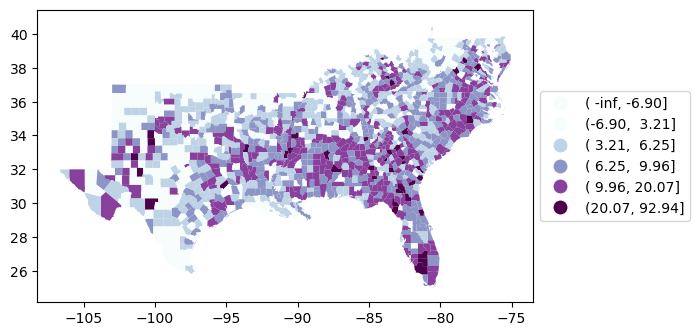

In [18]:
ax = df.plot(column='HR60', scheme='BoxPlot', \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'interval': True})

# Categorical Data # 

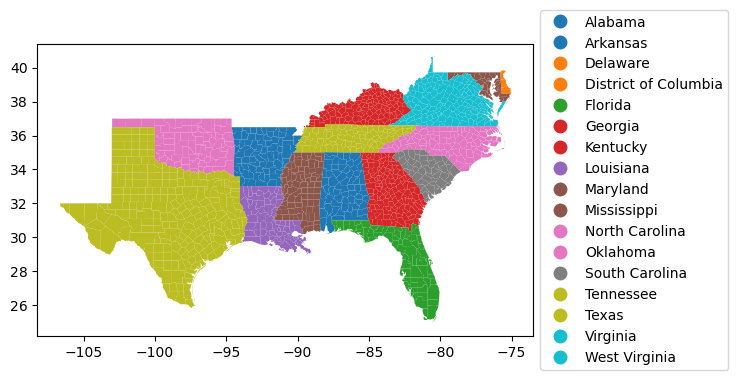

In [19]:
ax = df.plot(column='STATE_NAME', categorical=True, legend=True, \
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'fmt': "{:.0f}"}) # fmt is ignored for categorical data